<a href="https://colab.research.google.com/github/idanwekhai/Food-Classifier/blob/master/Food_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *


### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to grab different labels.

In [0]:
folder = 'poundedyam'
file = 'urls_poundedyam.txt'

In [0]:
folder = 'rice'
file = 'urls_rice.txt'

In [0]:
folder = 'plantain'
file ='urls_plantain.txt'

You will need to run this line once per each category.

In [0]:
path = Path('/food')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/food/poundedyam'),
 PosixPath('/food/urls_rice.txt'),
 PosixPath('/food/urls_poundedyam.txt'),
 PosixPath('/food/rice'),
 PosixPath('/food/plantain')]

## Download images

Now you will need to download you images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename and the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [0]:
classes = ['poundedyam','rice', 'plantain']

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://foodsfromafrica.com/wp-content/uploads/2017/04/iStock-525967894.jpg HTTPSConnectionPool(host='foodsfromafrica.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/04/iStock-525967894.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://bellarmart.com/wp-content/uploads/2017/02/unripe-plaintain-Copy.jpg HTTPSConnectionPool(host='bellarmart.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/02/unripe-plaintain-Copy.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://www.macmillandictionary.com/external/slideshow/full/Plantain_full.jpg ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))
Error https://foodsfromafrica.com/wp-content/uploads/2017/04/one-pot-berbere-plantain-spinach-stew-2.jpg HTTPSConnectionPool(host='foodsfromafrica.com', port=44

Then we can remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

poundedyam


cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000131.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000067.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000169.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000104.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000123.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000053.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000024.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000174.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000035.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000184.jpg'>
cannot identify image file <_io.BufferedReader name='/food/poundedyam/00000005.jpg'>
rice


cannot identify image file <_io.BufferedReader name='/food/rice/00000168.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/food/rice/00000124.jpg'>
cannot identify image file <_io.BufferedReader name='/food/rice/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='/food/rice/00000188.jpg'>
cannot identify image file <_io.BufferedReader name='/food/rice/00000158.jpg'>
plantain


cannot identify image file <_io.BufferedReader name='/food/plantain/00000122.jpg'>
cannot identify image file <_io.BufferedReader name='/food/plantain/00000048.png'>
cannot identify image file <_io.BufferedReader name='/food/plantain/00000182.jpg'>
cannot identify image file <_io.BufferedReader name='/food/plantain/00000101.jpg'>
cannot identify image file <_io.BufferedReader name='/food/plantain/00000193.jpg'>
cannot identify image file <_io.BufferedReader name='/food/plantain/00000129.jpg'>


## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(".", folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [0]:
data.classes

['plantain', 'poundedyam', 'rice']

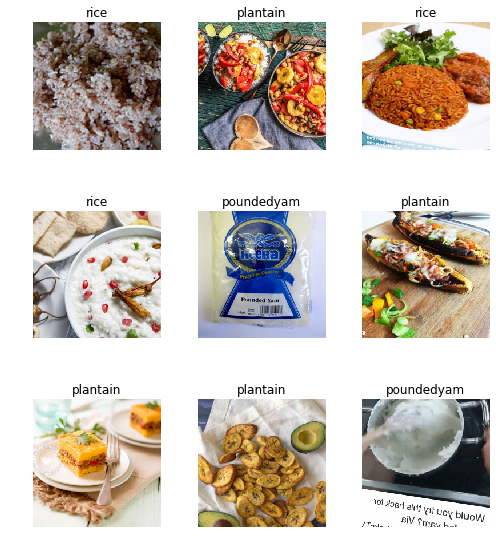

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['plantain', 'poundedyam', 'rice'], 3, 456, 113)

## Train model

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 63335318.03it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.091845,0.549298,0.203540,00:07
1,0.717125,0.217245,0.070796,00:07
2,0.524411,0.190793,0.070796,00:07
3,0.407660,0.191503,0.070796,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


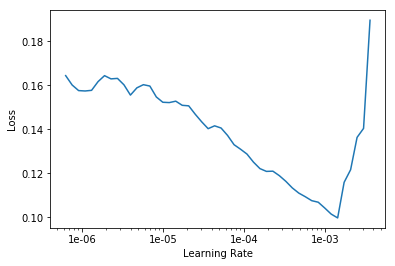

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.067513,0.239126,0.061947,00:07
1,0.060752,0.229214,0.061947,00:08


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

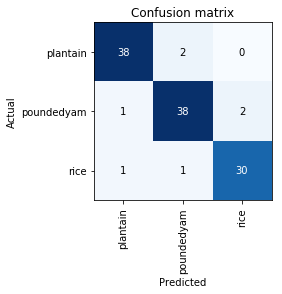

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=2)

[('plantain', 'poundedyam', 2), ('poundedyam', 'rice', 2)]

## Putting the model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

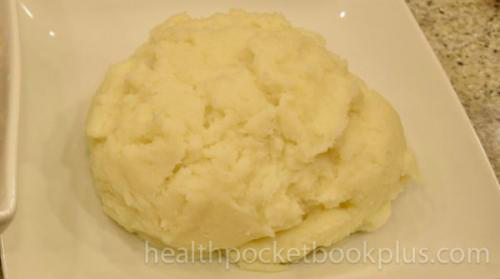

In [0]:
img = open_image(path/'poundedyam'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category poundedyam

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


    100% |████████████████████████████████| 993kB 25.0MB/s 


In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile({'parents':[{u'id': '1C2B5hcQdWPqus0aM-Z8kerO8Ol7sIvoD'}]})
file.SetContentFile('/food/export.pkl')
file.Upload() 